In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 15

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
3/3 [==============================] - 2s 223ms/step - loss: 2.7087 - accuracy: 0.0681 - val_loss: 2.6597 - val_accuracy: 0.0920

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.7289 - accuracy: 0.0652 - val_loss: 2.6520 - val_accuracy: 0.0920

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.7144 - accuracy: 0.0876 - val_loss: 2.6462 - val_accuracy: 0.1034

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.7040 - accuracy: 0.0778 - val_loss: 2.6424 - val_accuracy: 0.1034

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.6807 - accuracy: 0.0866 - val_loss: 

3/3 [==============================] - 0s 14ms/step - loss: 2.4297 - accuracy: 0.1741 - val_loss: 2.4033 - val_accuracy: 0.2184

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.4260 - accuracy: 0.1868 - val_loss: 2.3961 - val_accuracy: 0.2184

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.4757 - accuracy: 0.1751 - val_loss: 2.3883 - val_accuracy: 0.2184

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.4221 - accuracy: 0.1644 - val_loss: 2.3801 - val_accuracy: 0.2299

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.4444 - accuracy: 0.1984 - val_loss: 2.3720 - v

Epoch 75/1000
3/3 [==============================] - 0s 13ms/step - loss: 2.2685 - accuracy: 0.2345 - val_loss: 2.1930 - val_accuracy: 0.2414

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.2723 - accuracy: 0.1916 - val_loss: 2.1877 - val_accuracy: 0.2414

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.2771 - accuracy: 0.2091 - val_loss: 2.1827 - val_accuracy: 0.2414

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.2559 - accuracy: 0.2306 - val_loss: 2.1808 - val_accuracy: 0.2414

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.2600 - accuracy: 0.2111 - val_lo

3/3 [==============================] - 0s 16ms/step - loss: 2.1269 - accuracy: 0.2422 - val_loss: 1.9779 - val_accuracy: 0.1954

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.1144 - accuracy: 0.2374 - val_loss: 1.9760 - val_accuracy: 0.1954

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.1554 - accuracy: 0.2325 - val_loss: 1.9752 - val_accuracy: 0.1954

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.0695 - accuracy: 0.2909 - val_loss: 1.9747 - val_accuracy: 0.1954

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.0878 - accuracy: 0.2510 - val_loss: 1.9732

3/3 [==============================] - 0s 16ms/step - loss: 1.9817 - accuracy: 0.2899 - val_loss: 1.8564 - val_accuracy: 0.3908

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.9761 - accuracy: 0.3143 - val_loss: 1.8538 - val_accuracy: 0.4023

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.9611 - accuracy: 0.3055 - val_loss: 1.8508 - val_accuracy: 0.4138

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.9520 - accuracy: 0.2850 - val_loss: 1.8487 - val_accuracy: 0.4138

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.9829 - accuracy: 0.2850 - val_loss: 1.8464

3/3 [==============================] - 0s 14ms/step - loss: 1.8666 - accuracy: 0.3298 - val_loss: 1.7772 - val_accuracy: 0.3908

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.8724 - accuracy: 0.3103 - val_loss: 1.7783 - val_accuracy: 0.4023

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.8832 - accuracy: 0.3522 - val_loss: 1.7792 - val_accuracy: 0.4138

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.9137 - accuracy: 0.2762 - val_loss: 1.7793 - val_accuracy: 0.4138

Epoch 00189: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 190/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.8534 - accuracy: 0.3297 - val_loss: 1.7778

3/3 [==============================] - 0s 14ms/step - loss: 1.8669 - accuracy: 0.3541 - val_loss: 1.6576 - val_accuracy: 0.4483

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.7800 - accuracy: 0.3609 - val_loss: 1.6551 - val_accuracy: 0.4483

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.7969 - accuracy: 0.3181 - val_loss: 1.6538 - val_accuracy: 0.4828

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.7493 - accuracy: 0.3892 - val_loss: 1.6496 - val_accuracy: 0.5057

Epoch 00226: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 227/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.8285 - accuracy: 0.3872 - val_loss: 1.6445

3/3 [==============================] - 0s 15ms/step - loss: 1.7229 - accuracy: 0.3424 - val_loss: 1.5390 - val_accuracy: 0.5747

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.7043 - accuracy: 0.3833 - val_loss: 1.5418 - val_accuracy: 0.5747

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.6736 - accuracy: 0.3959 - val_loss: 1.5465 - val_accuracy: 0.5632

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.7431 - accuracy: 0.3725 - val_loss: 1.5483 - val_accuracy: 0.5747

Epoch 00263: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 264/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.6746 - accuracy: 0.4212 - val_loss: 1.5458

3/3 [==============================] - 0s 13ms/step - loss: 1.6026 - accuracy: 0.3950 - val_loss: 1.4223 - val_accuracy: 0.6092

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.6153 - accuracy: 0.3998 - val_loss: 1.4172 - val_accuracy: 0.6092

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.5846 - accuracy: 0.3852 - val_loss: 1.4133 - val_accuracy: 0.6092

Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 300/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.5722 - accuracy: 0.4640 - val_loss: 1.4088 - val_accuracy: 0.6207

Epoch 00300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 301/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.6385 - accuracy: 0.3735 - val_loss: 1.4073

3/3 [==============================] - 0s 15ms/step - loss: 1.5352 - accuracy: 0.4494 - val_loss: 1.3564 - val_accuracy: 0.6322

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.5459 - accuracy: 0.4572 - val_loss: 1.3532 - val_accuracy: 0.6552

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.5133 - accuracy: 0.4582 - val_loss: 1.3504 - val_accuracy: 0.6552

Epoch 00336: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 337/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.5536 - accuracy: 0.3968 - val_loss: 1.3483 - val_accuracy: 0.6667

Epoch 00337: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 338/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.5447 - accuracy: 0.4339 - val_loss: 1.3473

3/3 [==============================] - 0s 15ms/step - loss: 1.5372 - accuracy: 0.4737 - val_loss: 1.2560 - val_accuracy: 0.7126

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4745 - accuracy: 0.4571 - val_loss: 1.2551 - val_accuracy: 0.7011

Epoch 00372: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 373/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.4815 - accuracy: 0.4563 - val_loss: 1.2544 - val_accuracy: 0.7011

Epoch 00373: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 374/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.5165 - accuracy: 0.4426 - val_loss: 1.2541 - val_accuracy: 0.6782

Epoch 00374: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 375/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.5075 - accuracy: 0.4358 - val_loss: 1.2532

3/3 [==============================] - 0s 14ms/step - loss: 1.5546 - accuracy: 0.4124 - val_loss: 1.2219 - val_accuracy: 0.6552

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4454 - accuracy: 0.4601 - val_loss: 1.2217 - val_accuracy: 0.6552

Epoch 00409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 410/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.4108 - accuracy: 0.4397 - val_loss: 1.2196 - val_accuracy: 0.6552

Epoch 00410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 411/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4385 - accuracy: 0.4747 - val_loss: 1.2147 - val_accuracy: 0.6782

Epoch 00411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 412/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.4592 - accuracy: 0.4280 - val_loss: 1.2109

3/3 [==============================] - 0s 17ms/step - loss: 1.3998 - accuracy: 0.4611 - val_loss: 1.1661 - val_accuracy: 0.6782

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.4283 - accuracy: 0.4679 - val_loss: 1.1609 - val_accuracy: 0.6897

Epoch 00446: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 447/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.4210 - accuracy: 0.4826 - val_loss: 1.1566 - val_accuracy: 0.7011

Epoch 00447: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 448/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.4536 - accuracy: 0.4660 - val_loss: 1.1521 - val_accuracy: 0.7241

Epoch 00448: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 449/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.4375 - accuracy: 0.4805 - val_loss: 1.1478

3/3 [==============================] - 0s 13ms/step - loss: 1.3203 - accuracy: 0.5282 - val_loss: 1.1193 - val_accuracy: 0.7356

Epoch 00482: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 483/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.4065 - accuracy: 0.4572 - val_loss: 1.1192 - val_accuracy: 0.7356

Epoch 00483: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 484/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.3362 - accuracy: 0.5351 - val_loss: 1.1185 - val_accuracy: 0.7356

Epoch 00484: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 485/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.3709 - accuracy: 0.4805 - val_loss: 1.1177 - val_accuracy: 0.7356

Epoch 00485: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 486/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.4476 - accuracy: 0.4562 - val_loss: 1.1136

3/3 [==============================] - 0s 15ms/step - loss: 1.2451 - accuracy: 0.5778 - val_loss: 1.0681 - val_accuracy: 0.7011

Epoch 00519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 520/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.3496 - accuracy: 0.4727 - val_loss: 1.0648 - val_accuracy: 0.7011

Epoch 00520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 521/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.3452 - accuracy: 0.4727 - val_loss: 1.0624 - val_accuracy: 0.7011

Epoch 00521: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 522/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.2678 - accuracy: 0.5253 - val_loss: 1.0594 - val_accuracy: 0.7011

Epoch 00522: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 523/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.2871 - accuracy: 0.5301 - val_loss: 1.0565

3/3 [==============================] - 0s 15ms/step - loss: 1.3061 - accuracy: 0.5340 - val_loss: 1.0007 - val_accuracy: 0.7471

Epoch 00556: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 557/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.2517 - accuracy: 0.5340 - val_loss: 1.0025 - val_accuracy: 0.7471

Epoch 00557: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 558/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.1403 - accuracy: 0.5769 - val_loss: 1.0059 - val_accuracy: 0.7356

Epoch 00558: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 559/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.2698 - accuracy: 0.5039 - val_loss: 1.0079 - val_accuracy: 0.7356

Epoch 00559: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 560/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.2296 - accuracy: 0.5253 - val_loss: 1.0100

3/3 [==============================] - 0s 39ms/step - loss: 1.2512 - accuracy: 0.5408 - val_loss: 0.9961 - val_accuracy: 0.7816

Epoch 00593: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 594/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.2301 - accuracy: 0.5380 - val_loss: 0.9940 - val_accuracy: 0.7931

Epoch 00594: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 595/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.2559 - accuracy: 0.5282 - val_loss: 0.9932 - val_accuracy: 0.8046

Epoch 00595: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 596/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.2365 - accuracy: 0.5515 - val_loss: 0.9951 - val_accuracy: 0.8161

Epoch 00596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 597/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.2417 - accuracy: 0.5273 - val_loss: 0.9971

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 13ms/step - loss: 0.9967 - accuracy: 0.7931


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.6752119e-02 1.8012612e-04 7.3845992e-03 4.3228929e-04 2.3171872e-01
 2.8069136e-01 2.0665435e-01 1.0592699e-05 1.8519735e-05 3.0150460e-02
 1.7840062e-01 1.4195534e-04 1.7055292e-05 1.1892786e-06 7.4460506e-03]
5


# 混同行列

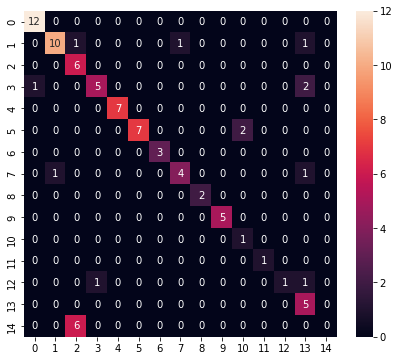

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.77      0.83        13
           2       0.46      1.00      0.63         6
           3       0.83      0.62      0.71         8
           4       1.00      1.00      1.00         7
           5       1.00      0.78      0.88         9
           6       1.00      1.00      1.00         3
           7       0.80      0.67      0.73         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         5
          10       0.33      1.00      0.50         1
          11       1.00      1.00      1.00         1
          12       1.00      0.33      0.50         3
          13       0.50      1.00      0.67         5
          14       0.00      0.00      0.00         6

    accuracy                           0.79        87
   macro avg       0.78      0.81      0.76        87
weig

D:\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Lim\AppData\Local\Temp\tmp8yjjm4f3\assets


6848

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.6746323e-02 1.7997286e-04 7.3814755e-03 4.3283362e-04 2.3161244e-01
 2.8078973e-01 2.0657951e-01 1.0586615e-05 1.8526669e-05 3.0181793e-02
 1.7845459e-01 1.4215765e-04 1.7041380e-05 1.1897296e-06 7.4519129e-03]
5
